<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Quantum_computing4/blob/main/SVM_QC_inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Cargar la base de datos desde un archivo CSV
data = pd.read_csv('traindata.csv')
data

,Unnamed: 0,FeatureA,FeatureB,Target
0,0,5.152212,4.649557,1.0
1,1,5.969026,0.502655,1.0
2,2,3.581416,5.654867,1.0
3,3,1.759292,1.068142,1.0
4,4,5.089380,4.586725,1.0
...,...,...,...,...
1595,1595,0.188496,4.586725,0.0
1596,1596,1.005310,0.565487,0.0
1597,1597,5.277876,6.094690,0.0
1598,1598,2.953097,4.523893,0.0


In [ ]:
# Cargar la base de datos desde un archivo CSV
data_test = pd.read_csv('validationdata.csv')
data_test

,Unnamed: 0,FeatureA,FeatureB,Target
0,0,4.900885,1.256637,1.0
1,1,4.586725,1.570796,1.0
2,2,0.000000,3.267256,1.0
3,3,2.638938,4.209734,1.0
4,4,4.963716,4.963716,1.0
...,...,...,...,...
395,395,5.403539,5.466371,0.0
396,396,0.125664,4.461062,0.0
397,397,6.031858,2.261947,0.0
398,398,5.466371,2.764602,0.0


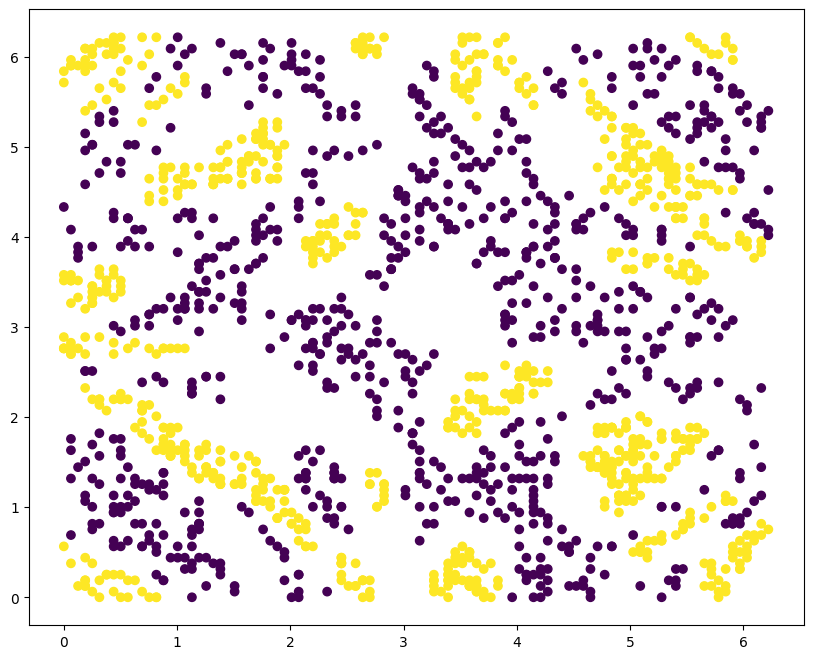

In [ ]:
# Visualizar la base de datos en un gráfico con colores
plt.figure(figsize=(10, 8))
# Dibujar los puntos de cada clase con colores diferentes
plt.scatter(data['FeatureA'],data['FeatureB'], c=data['Target'])

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[['FeatureA','FeatureB']], data['Target'], test_size=0.2, random_state=42)

Creamos el modelo SVM con un kernel lineal

In [ ]:
# Crear un modelo SVM: linear
svm_model_1 = SVC(kernel='linear')

# Entrenar el modelo en el conjunto de entrenamiento
svm_model_1.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model_1.predict(X_test)

# Calcular la precisión en el conjunto de prueba
accuracy = svm_model_1.score(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

# Realizar validación cruzada para evaluar el modelo de manera más robusta
cv_scores = cross_val_score(svm_model_1, X_train, y_train, cv=5)

# Imprimir los puntajes de validación cruzada
print("Puntajes de Validación Cruzada:", cv_scores)
print("Precisión Promedio:", cv_scores.mean())

Precisión en el conjunto de prueba: 46.56%
Puntajes de Validación Cruzada: [0.51953125 0.5078125  0.5078125  0.5078125  0.5078125 ]
Precisión Promedio: 0.51015625


Como sabemos que el kernel no es muy eficaz, lo cambiamos. A parte de cambiar otros parámetros para llegar a un resultado más óptimo.

In [ ]:
# Crear un modelo SVM: linear
svm_model_2 = SVC(kernel='rbf', C = 1000, gamma = 30)

# Entrenar el modelo en el conjunto de entrenamiento
svm_model_2.fit(X_train, y_train)

# Calcular la precisión en el conjunto de prueba
accuracy = svm_model_2.score(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

# Realizar validación cruzada para evaluar el modelo de manera más robusta
cv_scores = cross_val_score(svm_model_2, X_train, y_train, cv=5)

# Imprimir los puntajes de validación cruzada
print("Puntajes de Validación Cruzada:", cv_scores)
print("Precisión Promedio:", cv_scores.mean())

Precisión en el conjunto de prueba: 99.38%
Puntajes de Validación Cruzada: [0.9921875  0.9765625  0.98828125 0.98828125 0.984375  ]
Precisión Promedio: 0.9859375


Una vez tenemos nuestro mejor modelo creado con los mejores parámetros que hemos elegido, realizamos nuestro modelo con todos los datos de entrenamiento y de test que nos ofrece. Obteniendo así una precisión del 99%.

In [ ]:
# Crear un modelo SVM: linear
svm_model_3 = SVC(kernel='rbf', C = 1000, gamma = 30)

# Entrenar el modelo en el conjunto de entrenamiento
svm_model_3.fit(data[['FeatureA','FeatureB']], data['Target'])

# Calcular la precisión en el conjunto de prueba
accuracy = svm_model_3.score(data_test[['FeatureA','FeatureB']], data_test['Target'])
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

pred = svm_model_3.predict(data_test[['FeatureA','FeatureB']])

print(
    f"Estadísticas del modelo {svm_model_3}:\n"
    f"{metrics.classification_report(data_test['Target'], pred)}"
)

Precisión en el conjunto de prueba: 99.00%
Estadísticas del modelo SVC(C=1000, gamma=30):
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       200
         1.0       0.99      0.99      0.99       200

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

